In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds_wind = xr.open_dataset(r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\SAR_day2.nc")
wind_quality = ds_wind['owiWindQuality']  # Quality levels: 0, 1, 2, 3
wind_speed = ds_wind['owiWindSpeed']  # Wind speed (m/s)
wind_direction = ds_wind['owiWindDirection']  # Wind direction (degrees)
wind_lon = ds_wind["owiLon"]
wind_lat = ds_wind["owiLat"]

c:\Users\Sussi\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\Sussi\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


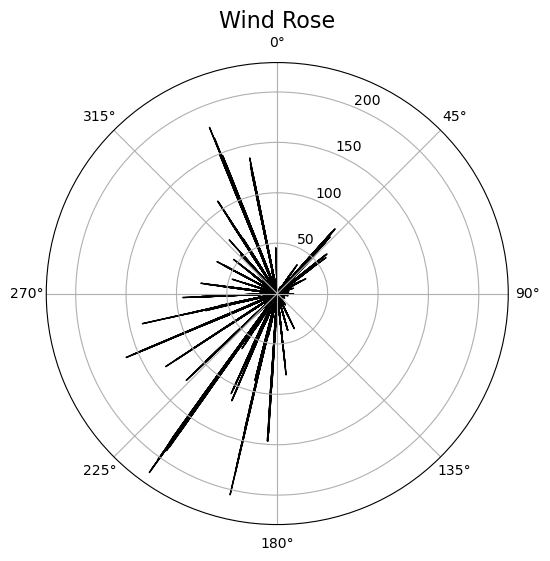

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Filter valid wind quality
valid_mask = wind_quality >= 1  # Use only good quality data
directions = wind_direction.where(valid_mask, drop=True).values
speeds = wind_speed.where(valid_mask, drop=True).values

# Convert degrees to radians for plotting
theta = np.deg2rad(directions)

# Wind Rose using polar histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
ax.hist(theta, bins=36, weights=speeds, edgecolor='black')
ax.set_theta_zero_location("N")  # 0° at the top
ax.set_theta_direction(-1)  # Clockwise
ax.set_title("Wind Rose", fontsize=16)
plt.show()


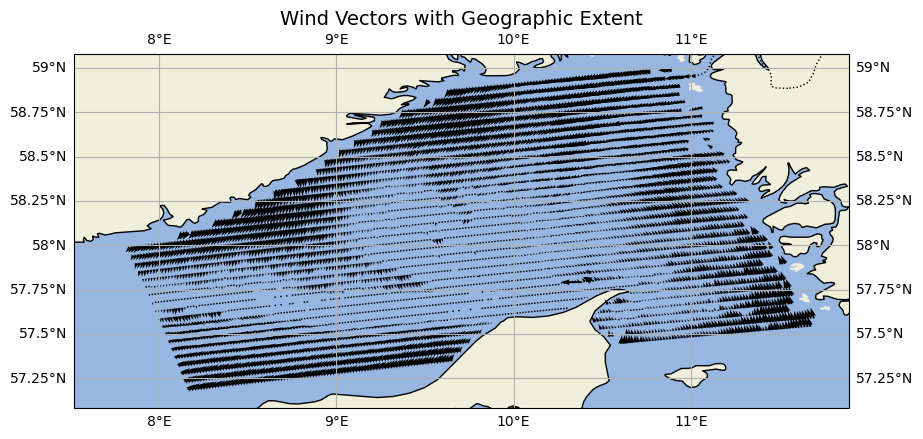

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# Assume you already extracted filtered lat, lon, speed, direction
u = speed * np.sin(np.deg2rad(direction))
v = speed * np.cos(np.deg2rad(direction))

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the desired geographic extent
#ax.set_extent([10.5, 11.5, 57.6, 58.6], crs=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.gridlines(draw_labels=True)

# Plot wind vectors, subsampled for readability
step = 5
ax.quiver(lon[::step], lat[::step], u[::step], v[::step], transform=ccrs.PlateCarree())

ax.set_title("Wind Vectors with Geographic Extent", fontsize=14)
plt.show()
